In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | port hedland
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | abbeville
Processing Record 5 of Set 1 | ekhabi
Processing Record 6 of Set 1 | ayan
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | fairbanks
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | wanning
Processing Record 14 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 1 | okhotsk
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | tabou
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | giyon
Processing Record 22 of Set 1 | makokou
Processing Record 23 of S

Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | penzance
Processing Record 41 of Set 4 | bokspits
City not found. Skipping...
Processing Record 42 of Set 4 | lorengau
Processing Record 43 of Set 4 | villablino
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | salinopolis
Processing Record 46 of Set 4 | riyadh
Processing Record 47 of Set 4 | gat
Processing Record 48 of Set 4 | moerai
Processing Record 49 of Set 4 | tilichiki
Processing Record 50 of Set 4 | high prairie
Processing Record 1 of Set 5 | samusu
City not found. Skipping...
Processing Record 2 of Set 5 | kemise
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | atuona
Processing Record 5 of Set 5 | nizhniy odes
Processing Record 6 of Set 5 | tsiroanomandidy
Processing Record 7 of Set 5 | port augusta
Processing Record 8 of Set 5 | opuwo
Processing Record 9 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 10 of Set 5 | adrar
Processing Record 11

Processing Record 26 of Set 8 | tyret pervaya
Processing Record 27 of Set 8 | papara
Processing Record 28 of Set 8 | cidreira
Processing Record 29 of Set 8 | lolua
City not found. Skipping...
Processing Record 30 of Set 8 | neiafu
Processing Record 31 of Set 8 | salinas
Processing Record 32 of Set 8 | bahia blanca
Processing Record 33 of Set 8 | ugoofaaru
Processing Record 34 of Set 8 | half moon bay
Processing Record 35 of Set 8 | hay river
Processing Record 36 of Set 8 | boende
Processing Record 37 of Set 8 | codrington
Processing Record 38 of Set 8 | dalbandin
Processing Record 39 of Set 8 | san cristobal
Processing Record 40 of Set 8 | westport
Processing Record 41 of Set 8 | novoukrayinka
Processing Record 42 of Set 8 | saint george
Processing Record 43 of Set 8 | coahuayana
Processing Record 44 of Set 8 | fortuna
Processing Record 45 of Set 8 | hofn
Processing Record 46 of Set 8 | salym
Processing Record 47 of Set 8 | yablonovo
Processing Record 48 of Set 8 | palmeira das missoes

Processing Record 14 of Set 12 | butte
Processing Record 15 of Set 12 | lagoa
Processing Record 16 of Set 12 | komsomolskiy
Processing Record 17 of Set 12 | maniitsoq
Processing Record 18 of Set 12 | san felipe
Processing Record 19 of Set 12 | ponta do sol
Processing Record 20 of Set 12 | hervey bay
Processing Record 21 of Set 12 | canon city
Processing Record 22 of Set 12 | matagami
Processing Record 23 of Set 12 | pimentel
Processing Record 24 of Set 12 | mporokoso
Processing Record 25 of Set 12 | monte alegre
Processing Record 26 of Set 12 | nantucket
Processing Record 27 of Set 12 | flagstaff
Processing Record 28 of Set 12 | laramie
Processing Record 29 of Set 12 | jiddah
City not found. Skipping...
Processing Record 30 of Set 12 | jiroft
City not found. Skipping...
Processing Record 31 of Set 12 | lieksa
Processing Record 32 of Set 12 | dom pedrito
Processing Record 33 of Set 12 | pangody
Processing Record 34 of Set 12 | dingle
Processing Record 35 of Set 12 | billings
Processing 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pacific Grove,36.6177,-121.9166,75.20,81,39,14.00,US,2022-07-12 20:54:52
1,Port Hedland,-20.3167,118.5667,57.25,47,3,8.05,AU,2022-07-12 20:54:52
2,Ilulissat,69.2167,-51.1000,38.89,86,100,3.42,GL,2022-07-12 20:54:53
3,Abbeville,50.1000,1.8333,76.48,34,96,4.97,FR,2022-07-12 20:54:53
4,Ekhabi,53.5102,142.9671,59.13,75,0,12.03,RU,2022-07-12 20:54:53
5,Ayan,56.4500,138.1667,58.71,98,98,0.45,RU,2022-07-12 20:54:54
6,Cape Town,-33.9258,18.4232,58.37,90,0,8.05,ZA,2022-07-12 20:50:02
7,Saskylakh,71.9167,114.0833,39.67,81,100,11.12,RU,2022-07-12 20:54:54
8,Ushuaia,-54.8000,-68.3000,38.86,81,75,9.22,AR,2022-07-12 20:50:10
9,Busselton,-33.6500,115.3333,55.15,86,18,7.43,AU,2022-07-12 20:54:55


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_new_df = city_data_df[new_column_order]
city_data_new_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pacific Grove,US,2022-07-12 20:54:52,36.6177,-121.9166,75.20,81,39,14.00
1,Port Hedland,AU,2022-07-12 20:54:52,-20.3167,118.5667,57.25,47,3,8.05
2,Ilulissat,GL,2022-07-12 20:54:53,69.2167,-51.1000,38.89,86,100,3.42
3,Abbeville,FR,2022-07-12 20:54:53,50.1000,1.8333,76.48,34,96,4.97
4,Ekhabi,RU,2022-07-12 20:54:53,53.5102,142.9671,59.13,75,0,12.03


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

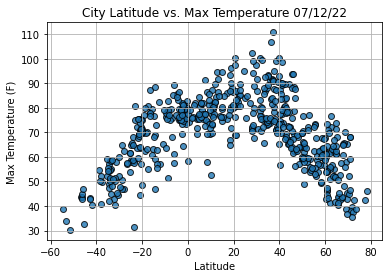

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

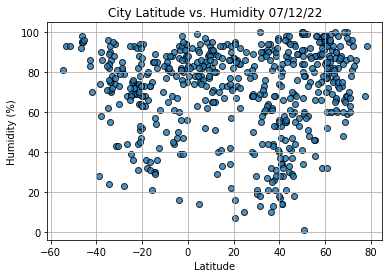

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

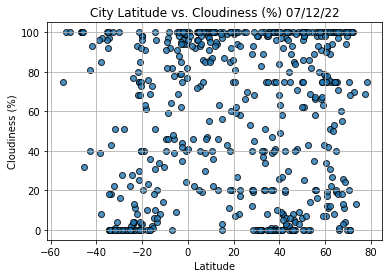

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

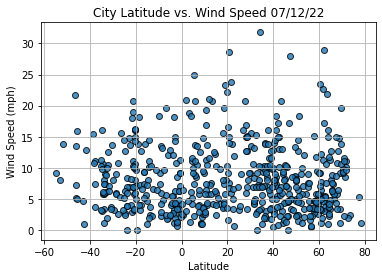

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()